In [61]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('https://query.data.world/s/dgyj35citerdqk36rou52lgmfhfity',header=None)
df.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [65]:
X.shape

(178, 13)

In [66]:
y.shape

(178,)

In [67]:
sc = StandardScaler()

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [69]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [70]:
cov_mat = np.cov(X_train_std.T)
eigenval,eigenvec = np.linalg.eig(cov_mat)

In [71]:
print('Eigenvalues :\n{}'.format(eigenval))

Eigenvalues :
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [72]:
print('The variance explained ratio :\n')
tot = sum(eigenval)
var_exp = [(i/tot) for i in sorted(eigenval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print('\n')
print('Cumulative variance explained ration :\n')
print(cum_var_exp)

The variance explained ratio :

[0.37329647723490733, 0.1881892610659955, 0.10896790724757788, 0.07724389477124867, 0.06478594601826176, 0.04592013811478145, 0.03986935597634709, 0.025219142607261553, 0.022581806817679687, 0.0183092447195269, 0.016353362655051454, 0.01284270583749273, 0.0064207569338683036]


Cumulative variance explained ration :

[0.37329648 0.56148574 0.67045365 0.74769754 0.81248349 0.85840362
 0.89827298 0.92349212 0.94607393 0.96438317 0.98073654 0.99357924
 1.        ]


In [73]:
import matplotlib.pyplot as plt

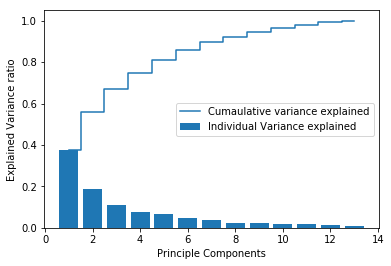

In [74]:
plt.bar(range(1,14),var_exp,label='Individual Variance explained',align='center')
plt.step(range(1,14),cum_var_exp,label='Cumaulative variance explained',where='mid')
plt.legend(loc='best')
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance ratio')
plt.show()

In [75]:
eigen_pairs = [(np.abs(eigenval[i]),eigenvec[:,i]) for i in range(len(eigenval))]
eigen_pairs.sort(reverse=True)

In [76]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print('Projection Matrix(first 2 PCA) \n\n{}'.format(w))

Projection Matrix(first 2 PCA) 

[[ 0.14669811 -0.50417079]
 [-0.24224554 -0.24216889]
 [-0.02993442 -0.28698484]
 [-0.25519002  0.06468718]
 [ 0.12079772 -0.22995385]
 [ 0.38934455 -0.09363991]
 [ 0.42326486 -0.01088622]
 [-0.30634956 -0.01870216]
 [ 0.30572219 -0.03040352]
 [-0.09869191 -0.54527081]
 [ 0.30032535  0.27924322]
 [ 0.36821154  0.174365  ]
 [ 0.29259713 -0.36315461]]


In [77]:
X_train_pca = X_train_std.dot(w)

In [78]:
X_train_pca.shape

(124, 2)

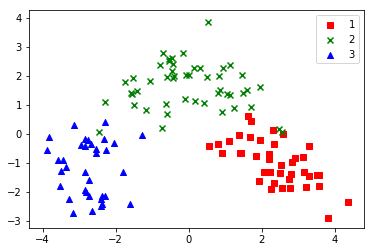

In [79]:
markers = ['s','x','^']
colors = ['r','g','b']
for i in (np.unique(y_train)):
    plt.scatter(X_train_pca[y_train==i,0],X_train_pca[y_train==i,1],c=colors[i-1],marker=markers[i-1],label=i)
plt.legend(loc='best')
plt.show()

In [80]:
np.unique(y_train)

array([1, 2, 3], dtype=int64)